# Evaluate permeation number W

The permeation number, W, is a dimensionless value which can be used to inform if the permeation regime within a single substrate (no barrier) follows a diffusion limited or a surface limited regime.

It can be evaulated by using material and hydrogen transport properties for a given material:

$$W = \frac{K_{\mathrm{d}} e \sqrt{P}}{D K_{\mathrm{S}}}$$

Where $K_{\mathrm{d}}$ is the dissociation coefficient, $e$ is the thickness of the material, $P$ is the upstream pressure, $D$ is the diffusivity and $K_{\mathrm{S}}$ is the Sieverts constant or solubility.

First we can consider a case with the material Inconel 625, the relevent properties can be obtained from [htm](https://github.com/RemDelaporteMathurin/h-transport-materials):

In [1]:
import h_transport_materials as htm

substrate_D = htm.diffusivities.filter(material="inconel_625")[0]
substrate_D_0 = substrate_D.pre_exp.magnitude
substrate_E_D = substrate_D.act_energy.magnitude

substrate_recomb = htm.recombination_coeffs.filter(material="inconel_625")[1]
substrate_Kr_0 = substrate_recomb.pre_exp.magnitude
substrate_E_Kr = substrate_recomb.act_energy.magnitude

substrate_diss = htm.dissociation_coeffs.filter(material="inconel_625")[1]
substrate_Kd_0 = substrate_diss.pre_exp.magnitude
substrate_E_Kd = substrate_diss.act_energy.magnitude

substrate_S = htm.Solubility(
    S_0=(substrate_diss.pre_exp / substrate_recomb.pre_exp) ** 0.5,
    E_S=(0.5 * (substrate_diss.act_energy - substrate_recomb.act_energy)),
)
substrate_S_0 = substrate_S.pre_exp.magnitude
substrate_E_S = substrate_S.act_energy.magnitude

With the material properties defined, a relavent parameter space can be defined for the upstream pressure,$P$, the material thickness, $e$, and the material temperature, $T$.

For this study the parameters will be varied between:

$$10^{2} < P_{\mathrm{up}}(\mathrm{Pa}) < 10^{5}$$

$$0.2 < e(\mathrm{mm}) < 1$$

$$200 < T(\mathrm{^{\circ}C}) < 400$$

In [2]:
import numpy as np

default_P = 1e4  # Pa
default_e = 974e-6  # m
default_T = 380 + 273.15  # K

P_testing = np.geomspace(
    1e2, 1e05, num=100
)  # Pa  range taken from https://doi.org/10.1016/j.nme.2021.101062 Section 2.5
e_testing = np.geomspace(
    2e-4, 1e-3, num=100
)  # m minimum value taken from https://doi.org/10.1016/j.nme.2021.101062 Section 2.5
T_testing = np.linspace(200, 400, num=100) + 273.15  # K

With the testing parameter ranges defined we can test their influence on the permeation number, W

## Varying upstream pressure

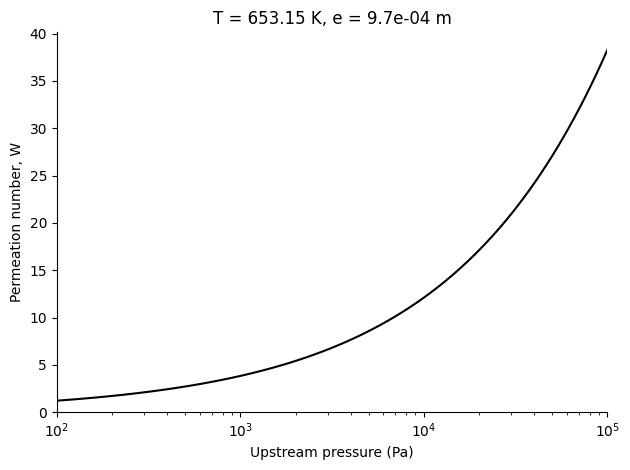

In [3]:
from festim_scripts import evaluate_permeation_number_W
import matplotlib.pyplot as plt

W_test_P = evaluate_permeation_number_W(
    P=P_testing,
    e=default_e,
    T=default_T,
    K_d_0=substrate_Kd_0,
    E_K_d=substrate_E_Kd,
    D_0=substrate_D_0,
    E_D=substrate_E_D,
    S_0=substrate_S_0,
    E_S=substrate_E_S,
)

plt.figure()
plt.title(f"T = {default_T} K, e = {default_e:.1e} m")
plt.plot(P_testing, W_test_P, color="black")
plt.xscale("log")
plt.ylabel("Permeation number, W")
plt.xlabel("Upstream pressure (Pa)")
plt.xlim(min(P_testing), max(P_testing))
plt.ylim(bottom=0)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.show()

## Varying material thickness

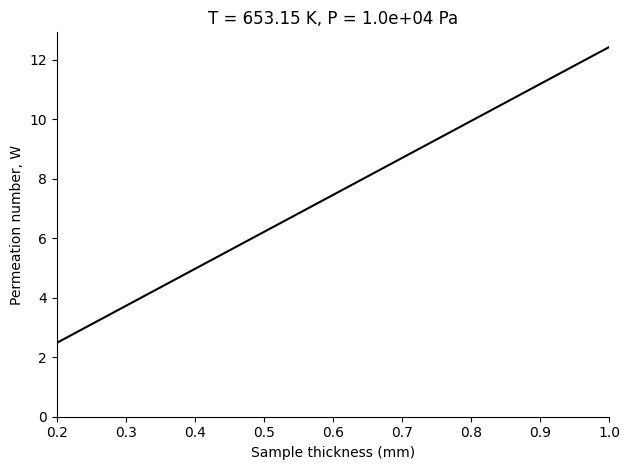

In [4]:
W_test_e = evaluate_permeation_number_W(
    P=default_P,
    e=e_testing,
    T=default_T,
    K_d_0=substrate_Kd_0,
    E_K_d=substrate_E_Kd,
    D_0=substrate_D_0,
    E_D=substrate_E_D,
    S_0=substrate_S_0,
    E_S=substrate_E_S,
)

plt.figure()
plt.title(f"T = {default_T} K, P = {default_P:.1e} Pa")
plt.plot(e_testing, W_test_e, color="black")
plt.ylabel("Permeation number, W")
plt.xlabel("Sample thickness (mm)")
plt.xlim(min(e_testing), max(e_testing))
e_ticks = np.linspace(2e-4, 1e-3, num=9)
e_plot = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.xticks(ticks=e_ticks, labels=e_plot)
plt.ylim(bottom=0)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.show()

## Varying material temperature

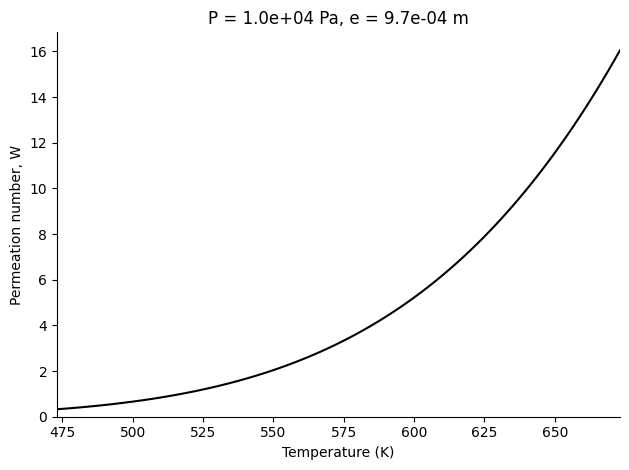

In [5]:
W_test_T = evaluate_permeation_number_W(
    P=default_P,
    e=default_e,
    T=T_testing,
    K_d_0=substrate_Kd_0,
    E_K_d=substrate_E_Kd,
    D_0=substrate_D_0,
    E_D=substrate_E_D,
    S_0=substrate_S_0,
    E_S=substrate_E_S,
)

plt.figure()
plt.title(f"P = {default_P:.1e} Pa, e = {default_e:.1e} m")
plt.plot(T_testing, W_test_T, color="black")
plt.ylabel("Permeation number, W")
plt.xlabel("Temperature (K)")
plt.xlim(min(T_testing), max(T_testing))
plt.ylim(bottom=0)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.show()

## Varying both material thickness and upstream pressure

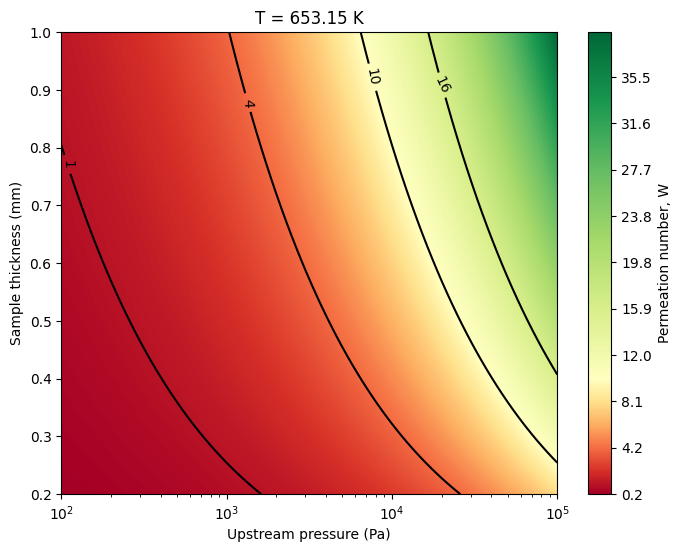

In [6]:
from matplotlib.colors import TwoSlopeNorm


X, Y = np.meshgrid(P_testing, e_testing)

Z = evaluate_permeation_number_W(
    P=X,
    e=Y,
    T=default_T,
    K_d_0=substrate_Kd_0,
    E_K_d=substrate_E_Kd,
    D_0=substrate_D_0,
    E_D=substrate_E_D,
    S_0=substrate_S_0,
    E_S=substrate_E_S,
)

plt.figure(figsize=(8, 6))
plt.title(f"T = {default_T} K")

# option for diverging colourbar
norm = TwoSlopeNorm(vmin=np.min(Z), vcenter=10, vmax=np.max(Z))
CS = plt.contourf(X, Y, Z, levels=1000, cmap="RdYlGn", norm=norm)

# CS = plt.contourf(X, Y, Z, levels=1000, cmap="viridis")
ax = plt.gca()
contour_lines = ax.contour(X, Y, Z, levels=[1, 4, 10, 16], colors="black")
ax.clabel(contour_lines, contour_lines.levels, fontsize=10)
cbar = plt.colorbar(CS, format="%.1f")
cbar.set_label("Permeation number, W")
plt.xlabel("Upstream pressure (Pa)")
plt.ylabel("Sample thickness (mm)")
plt.xscale("log")
plt.yticks(ticks=e_ticks, labels=e_plot)
plt.show()